In [330]:
import networkx as nx
import numpy as np
import math
from scipy.integrate import odeint
from scipy.optimize import fsolve
import copy
import matplotlib
import matplotlib.pylab as plt

In [331]:
def sis_forward_euler(N, I0, t, beta, gamma):
    St = np.zeros(len(t))
    It = np.zeros(len(t))
    St[0] = N - I0
    It[0] = I0
    
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        dSdt = -beta * St[i-1] * It[i-1] + gamma * It[i-1] / N
        dIdt = beta * St[i-1] * It[i-1]  - gamma * It[i-1] / N
        St[i] = St[i-1] + dSdt * dt
        It[i] = It[i-1] + dIdt * dt
    
    return St, It

def sis_analytical(i0,t,beta,gamma):
    return (beta-gamma)/(-((i0 * beta - beta + gamma) * np.exp(-beta*t + gamma*t))/i0 + beta)
    #return (1-(1/(beta/gamma)))/(1+(((1-(1/(beta/gamma))-i0))/i0) * np.exp((beta+gamma)*t))

def sis_plot(It,t):
    #plot the output
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, It, 'r', alpha=0.5,label='Forward Euler')
    plt.plot(t, sis_analytical(0.01,t,3,2), color="black", linestyle="--", label='Analytical')
    ax1.set_ylim([0.0, 0.5])
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()
    return

In [332]:
N = 1
beta = 3
gamma = 2
s0 = 0.99
i0 = 0.01

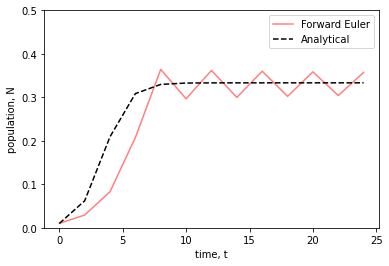

In [333]:
t = np.arange(0,25,2)
#St,It = sis_run(1,0.01, t, 3, 2)
St,It = sis_forward_euler(N,i0,t,beta,gamma)
sis_plot(It,t)

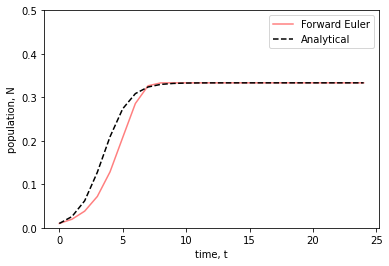

In [341]:
t = np.arange(0,25,1)
St,It = sis_forward_euler(N, i0, t, beta, gamma)
sis_plot(It,t)

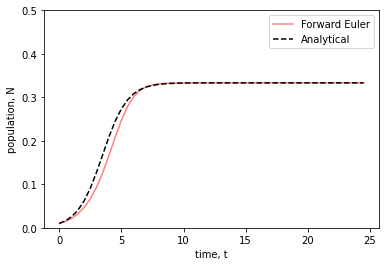

In [278]:
t = np.arange(0, 25, 0.5)
St,It = sis_forward_euler(N, i0, t, beta, gamma)
sis_plot(It,t)

In [342]:
def max_error(dt):
    
    t = np.arange(0, 25, dt)
    st, it = sis_forward_euler(1, 0.01, t, 3, 2)
    
    analytical = sis_analytical(i0,t,beta,gamma)
    error = np.abs(it - analytical)

    return np.max(error)

values = [2, 1, 0.5]
for dt in values:
    error = max_error(dt)
    print(f"Maximum absolute error for dt = {dt}: {error}")


Maximum absolute error for dt = 2: 0.1263393498870075
Maximum absolute error for dt = 1: 0.0807710743745694
Maximum absolute error for dt = 0.5: 0.042835046372046964


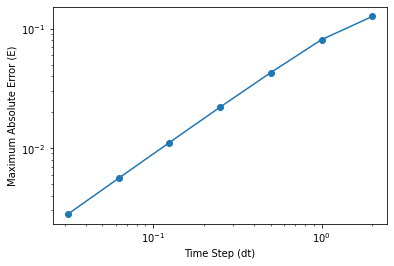

In [344]:
dt_values = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
errors = [max_error(dt) for dt in dt_values]
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.loglog(dt_values, errors, marker='o')
plt.xlabel('Time Step (dt)')
plt.ylabel('Maximum Absolute Error (E)')
plt.show()

In [493]:
#Leaky Vaccination
def leaky_sir(y, t, N, beta, gamma, VE): #basic SIR equations
    S, I, R, V = y
    dSdt = -beta * S * I
    dIdt = (beta * S * I) + ((beta * V * I) * (1-VE)) - gamma * I
    dRdt = gamma * I
    dVdt = -beta * V * I * (1 - VE)
    return dSdt, dIdt, dRdt, dVdt
    

def leaky_run(N,initial_i, t, R_0, gamma, VR, VE):
    
    #initial conditions
    beta = R_0 * gamma
    S0 = N - (N * VR* VE) - initial_i
    I0 = initial_i
    R0 = 0
    V0 = N * VR * VE
    y0 = S0 / N , I0 / N, R0, V0 / N
    
    #solve the ODEs for every step of t
    y = odeint(leaky_sir, y0, t, args=(N,beta,gamma,VE))
    St, It, Rt, Vt = y.T
    
    return St,It,Rt,Vt


def leaky_plot(St,It,Rt,Vt,t):
    #plot the output
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, St, 'b', alpha=0.5,label='S(t)')
    plt.plot(t, It, 'r', alpha=0.5,label='I(t)')
    plt.plot(t, Rt, 'g', alpha=0.5,label='R(t)')
    plt.plot(t, Vt, 'black', alpha=0.5,label='V(t)')
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()
    return

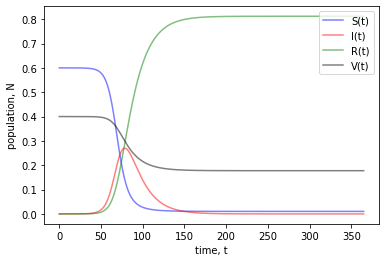

In [513]:
t = np.arange(0,365,0.1)
St,It,Rt,Vt = leaky_run(300000,1, t, 5, 1/14, 0.5, 0.8)
leaky_plot(St,It,Rt,Vt,t)

In [564]:
def AON_deriv(y, t, N, beta, gamma, VR, VE): #basic SIR equations
    S, I, R, V = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    dVdt = -beta * V * I
    return dSdt, dIdt, dRdt, dVdt
    

def AON_run(N,initial_i, t, R_0, gamma, VR, VE):
    
    #initial conditions
    beta = R_0 * gamma
    S0 = N - (N * VE * VR) - initial_i
    I0 = initial_i
    R0 = 0
    V0 = N * VR * VE
    y0 = S0 / N ,I0 / N, R0, V0/N
    
    #solve the ODEs for every step of t
    y = odeint(AON_deriv, y0, t, args=(N,beta,gamma, VR, VE))
    St, It, Rt, Vt = y.T
    
    return St,It,Rt,Vt 


def AON_plot(St,It,Rt,Vt,t):
    #plot the output
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, St, 'b', alpha=0.5,label='S(t)')
    plt.plot(t, It, 'r', alpha=0.5,label='I(t)')
    plt.plot(t, Rt, 'g', alpha=0.5,label='R(t)')
    #plt.axhline(y=0.4, color='black', lable = 'V(t)')
    plt.hlines(y=0.4, xmin=0, xmax=365, lw = 1, colors='black', label='V(t)')
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(loc='upper right');
    plt.show()
    return

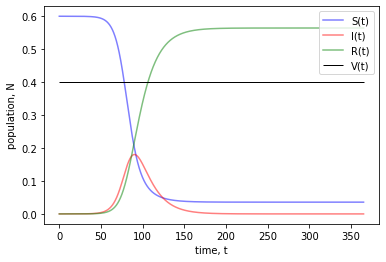

In [567]:
t = np.arange(0,365,0.1)
St,It,Rt,Vt = AON_run(300000, 1, t, 5, 1/14, 0.5, 0.8)
AON_plot(St,It,Rt,Vt,t)

In [527]:
def sir_deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
    

def sir_run(N,initial_i, t, R_0, gamma):
    
    beta = R_0 * gamma
    S0 = N - initial_i
    I0 = initial_i
    R0 = 0
    y0 = S0 / N ,I0 / N,R0
    
    y = odeint(sir_deriv, y0, t, args=(N,beta,gamma))
    St, It, Rt = y.T
    return St,It,Rt


def sir_plot(St,It,Rt,t):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plt.plot(t, St, 'b', alpha=0.5,label='S(t)')
    plt.plot(t, It, 'r', alpha=0.5,label='I(t)')
    plt.plot(t, Rt, 'g', alpha=0.5,label='R(t)')
    plt.ylabel('population, N')
    plt.xlabel('time, t')
    plt.legend(["St","It","Rt"],loc='upper right');
    plt.show()
    return
    

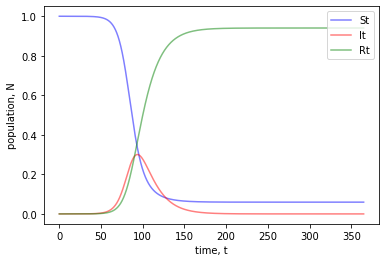

In [517]:
t = np.arange(0,365,0.1)
St,It,Rt = sir_run(300000,1, t, 3, 1/14)
sir_plot(St,It,Rt,t)